<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/ML_Lab4b_DummyVariable_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mutliple Linear Regression implementation on Diamonds dataset


https://www.kaggle.com/shivam2503/diamonds

Predicting price of a diamond based on independent variables like carat, color,cut,clarity, table, dimensions(x,y,z)

Tasks


Importing the Relevant Libraries

Loading the Data

Visualizing the Data Frame

Exploring the Data

Cleaning the data (Removing Null and zero values, removing unwanted unnnamed columns)

Deal with the categorical variables

Ascertain about multicollinearity 

Plot a heatmap to know about the correlation amongst the variables

Make decision on highly correlated independent variables and remove them

Identify and remove the outliers

Split the data into training set and test set

Fit a multiple linear regression model using sklearn

Get the model statistics using statsmodel

Apply the model on the test data

Obtain the r-squared value

Calculate Mean Square Error and Root Mean Square Error


In [146]:
#Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px #for plotting the scatter plot

import seaborn as sns #For plotting the dataset in seaborn
sns.set(style='whitegrid')

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv("/content/DiamondsNew.csv") #Read the dataset
print(df.head()) #to know about the content of the dataset

   Unnamed: 0      cut clarity color  price  ...  carat  table     x     y     z
0           1    Ideal     SI2     E    326  ...   0.23   55.0  3.95  3.98  2.43
1           2  Premium     SI1     E    326  ...   0.21   61.0  3.89  3.84  2.31
2           3     Good     VS1     E    327  ...   0.23   65.0  4.05  4.07  2.31
3           4  Premium     VS2     I    334  ...   0.29   58.0  4.20  4.23  2.63
4           5     Good     SI2     J    335  ...   0.31   58.0  4.34  4.35  2.75

[5 rows x 11 columns]


Data Cleaning/Preprocessing


In [148]:
df.columns # to know the columns in the dataframe

Index(['Unnamed: 0', 'cut', 'clarity', 'color', 'price', 'depth', 'carat',
       'table', 'x', 'y', 'z'],
      dtype='object')

Deleting unnamed column

In [149]:
df=df.drop(['Unnamed: 0'], axis=1) #Dropping the unwanted column

In [150]:
df.columns

Index(['cut', 'clarity', 'color', 'price', 'depth', 'carat', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [151]:
df.head() #visualize the dataframe

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [152]:
#examine the dataframe
df.describe()

,price,depth,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,61.749405,0.797940,57.457184,5.731157,5.734526,3.538734
std,3989.439738,1.432621,0.474011,2.234491,1.121761,1.142135,0.705699
min,326.000000,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,61.800000,0.700000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,62.500000,1.040000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,79.000000,5.010000,95.000000,10.740000,58.900000,31.800000


In [153]:
#to ascertain if the dataframe has any null value
df.isnull().any()

cut        False
clarity    False
color      False
price      False
depth      False
carat      False
table      False
x          False
y          False
z          False
dtype: bool

In [154]:
#to see if any columns has empty cells
for column in df:
  print(" Number of empty cells in {} is {} ". format(column, (df[column]=="").sum()))


 Number of empty cells in cut is 0 
 Number of empty cells in clarity is 0 
 Number of empty cells in color is 0 
 Number of empty cells in price is 0 
 Number of empty cells in depth is 0 
 Number of empty cells in carat is 0 
 Number of empty cells in table is 0 
 Number of empty cells in x is 0 
 Number of empty cells in y is 0 
 Number of empty cells in z is 0 


In [155]:
#Mthod 1 finding the number of zeros in each column

for column in df:
  print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in cut is 0
Number of zeros in clarity is 0
Number of zeros in color is 0
Number of zeros in price is 0
Number of zeros in depth is 0
Number of zeros in carat is 0
Number of zeros in table is 0
Number of zeros in x is 8
Number of zeros in y is 7
Number of zeros in z is 20


From the above table we see that  x (length), y(breadth) and z(depth) have zero as these minimum value


Need to remove these entries with 0

In [156]:
#Mothod 2 - Counting number of zero values in x,y and z column
print("Number of rows with 0 value in x is {}".format((df.x==0).sum()))
print("Number of rows with 0 value in y is {}".format((df.y==0).sum()))
print("Number of rows with 0 value in z is {}".format((df.z==0).sum()))
print("Number of null values in the dataframe is {}".format(df.isnull().sum())) #checking to see if there are any NaNs in the dataset

Number of rows with 0 value in x is 8
Number of rows with 0 value in y is 7
Number of rows with 0 value in z is 20
Number of null values in the dataframe is cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64


In [157]:
#dropping all zero values from x,y and z columns
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [158]:
#To confirm if all the zero values are removed
# Just to Confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,cut,clarity,color,price,depth,carat,table,x,y,z


In [159]:
#can also confirm by using describe()
df.describe()

,price,depth,carat,table,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,3930.993231,61.749514,0.797698,57.456834,5.731627,5.734887,3.540046
std,3987.280446,1.432331,0.473795,2.234064,1.119423,1.140126,0.702530
min,326.000000,43.000000,0.200000,43.000000,3.730000,3.680000,1.070000
25%,949.000000,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,61.800000,0.700000,57.000000,5.700000,5.710000,3.530000
75%,5323.250000,62.500000,1.040000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,79.000000,5.010000,95.000000,10.740000,58.900000,31.800000


We see that there are no NaN values

Dealing with categorical data

Ways-

**One hot encoding **

applied when the categorical data is not ordinal

Need to take care of dummy variable trap whcih gives high multicollinearity

**label encoding **

 applied to ordinal categorical data



Ref: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [160]:
# Method1
#create dummy variables
#using get_dummies() function
#one hot encoding
"""
df_dummies1 = pd.get_dummies(df, columns=['color'], drop_first=True)
df_dummies1.head()
"""

"\ndf_dummies1 = pd.get_dummies(df, columns=['color'], drop_first=True)\ndf_dummies1.head()\n"

In [161]:
# Method2-using label encoder for the categorical data
"""
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
"""

"\nfrom sklearn import preprocessing \nlabel_encoder = preprocessing.LabelEncoder() \n\ndf['cut'] = label_encoder.fit_transform(df['cut'])\ndf['color'] = label_encoder.fit_transform(df['color'])\ndf['clarity'] = label_encoder.fit_transform(df['clarity'])\n"

In [162]:
# Method3-Replacing the categorical value colour, cut and clarity without using built in function for categorical data

df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3, 'Very Good': 2, 'Good':1, 'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})


Note: Method 3 is used to deal witht he categorical variables

In [163]:
#Visualize the data frame
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,4,2,5,326,61.5,0.23,55.0,3.95,3.98,2.43
1,3,3,5,326,59.8,0.21,61.0,3.89,3.84,2.31
2,1,5,5,327,56.9,0.23,65.0,4.05,4.07,2.31
3,3,4,1,334,62.4,0.29,58.0,4.20,4.23,2.63
4,1,2,0,335,63.3,0.31,58.0,4.34,4.35,2.75


In [164]:
df.shape #To know the size of the dataframe

(53920, 10)

As x, y and z are length, height and depth, we can convert them to a single variable volume

In [165]:
df['volume']= df['x']*df['y']*df["z"] #Convert x,y and z into a single variable

In [166]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z,volume
0,4,2,5,326,61.5,0.23,55.0,3.95,3.98,2.43,38.202030
1,3,3,5,326,59.8,0.21,61.0,3.89,3.84,2.31,34.505856
2,1,5,5,327,56.9,0.23,65.0,4.05,4.07,2.31,38.076885
3,3,4,1,334,62.4,0.29,58.0,4.20,4.23,2.63,46.724580
4,1,2,0,335,63.3,0.31,58.0,4.34,4.35,2.75,51.917250


In [167]:
#now we can drop x,y,z columns

df=df.drop(['x','y','z'], axis=1)

In [168]:
#visualize the dataframe
df.head()

,cut,clarity,color,price,depth,carat,table,volume
0,4,2,5,326,61.5,0.23,55.0,38.202030
1,3,3,5,326,59.8,0.21,61.0,34.505856
2,1,5,5,327,56.9,0.23,65.0,38.076885
3,3,4,1,334,62.4,0.29,58.0,46.724580
4,1,2,0,335,63.3,0.31,58.0,51.917250


To check for multicollinearity

Ways-

1.Scatterplot

2.Calculate VIF

3.Obtain correlation matrix


Scatter pot and VIF were calculated in notebook 4a

Here we will plot the correlation matrix

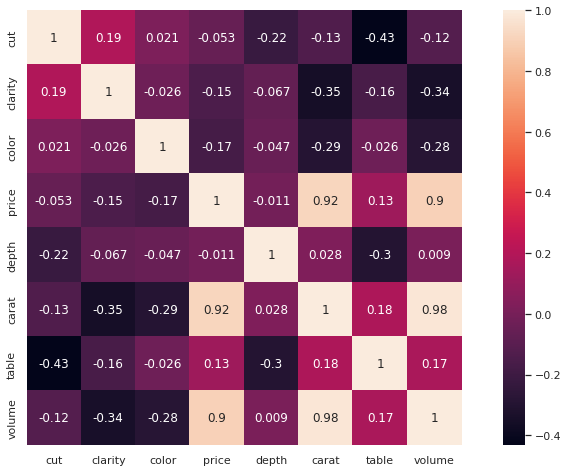

In [169]:
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True) 

It is seen that the carat and volume variables are highly correlated

Hence volume variable will not be used for regression

In [170]:
df=df.drop(['volume'], axis=1)# Dropping the volume column

In [171]:
df.head()

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
2,1,5,5,327,56.9,0.23,65.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0


Identify the outliers and remove them

In [172]:
df.shape

(53920, 7)

In [173]:
df1=df.copy() #Creating a copy of the dtaframe before deleting the columns


In [174]:
#Function to find the upper and lower limits to identify and remover outliers
def interQuartile(x):
  percentile25= x.quantile(0.25)
  percentile75=x.quantile(0.75)
  iqr=percentile75-percentile25
  upperLimit= percentile75+1.5*iqr
  lowerLimit= percentile25-1.5*iqr
  return upperLimit, lowerLimit

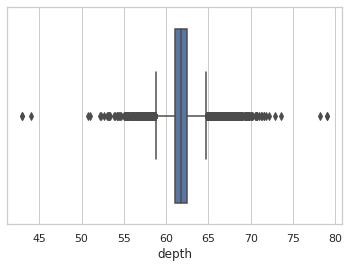

In [175]:
#removing outliers from depth
#Boxplot to visualize outliers in depth column
sns.boxplot(df2['depth'])
upper,lower= interQuartile(df2['depth'])
df= df[df['depth'] < upper]
df= df[df['depth']>lower]

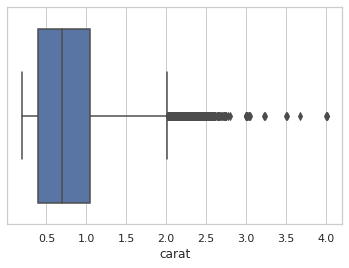

In [176]:
#removing outliers from carat
#Boxplot to visualize outliers in carat column
sns.boxplot(df['carat'])
upper,lower= interQuartile(df['carat'])
df= df[df['carat'] < upper]
df= df[df['carat']>lower]

In [177]:

df.head()

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0
5,2,6,0,336,62.8,0.24,57.0


In [178]:
df.shape

(50062, 7)

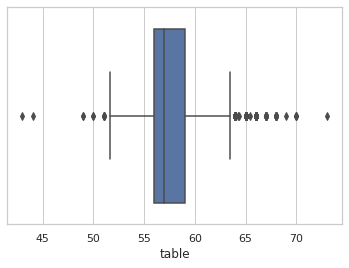

In [179]:
#removing outliers from table
#Boxplot to visualize outliers in table column
sns.boxplot(df['table'])
upper,lower= interQuartile(df['table'])
df= df[df['table'] < upper]
df= df[df['table']>lower]

In [180]:
df.head()

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0
5,2,6,0,336,62.8,0.24,57.0


In [181]:
df.shape

(49687, 7)

Implementing Multiple Linear regression using sklearn


In [182]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [183]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [184]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [185]:
#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)


In [186]:
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict


,Actual price,Predicted price
483,2821,3279.283561
46536,1781,2029.204882
315,2801,4201.953563
32910,810,642.244889
13217,5458,6628.551677
...,...,...
12938,5384,6335.171158
52761,2562,2894.595892
14724,605,-175.668568
9964,4702,6307.424614


In [187]:
PricePredict=PricePredict[(PricePredict > 0).all(1)]

In [188]:
#Model Evaluation

MSE= (np.sum((PricePredict['Actual price']-PricePredict['Predicted price'])**2))/(len(y_test)-7-1)

In [189]:
print(MSE)

1015223.6971959624


In [190]:
np.sqrt(MSE) #Obtain root means square error

1007.5830969185432

In [191]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.8996584792250198


Using statsmodels module to obtain the regression model

REF:

https://www.statsmodels.org/stable/index.html

https://mode.com/python-tutorial/libraries/statsmodels/

In [192]:
#Obtain root mean square error
sm.tools.eval_measures.rmse(y_test, y_prediction, axis=0) 

#We see that this value is same as the value that is obtained above

1100.1136032697927

In [195]:
x = sm.add_constant(x) #This is the intercept that has to be added to create the model

In [196]:
modelNew = sm.OLS(y, x) # create the model
fitted = modelNew.fit() #fit the model

In [197]:
fitted.summary() #Obtain the results of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 7.424e+04
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        03:54:18   Log-Likelihood:            -4.1977e+05
No. Observations:               49687   AIC:                         8.396e+05
Df Residuals:                   49680   BIC:                         8.396e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2749.6090    434.634     -6.326      0.000   -3601.497   -1897.721
cut           60.6087      6.028     10.054      0.000      48.794      72.424
clarity      510.0462      3.335    152.948      0.000     503.510     516.582
color        316.6137      3.146    100.647      0.000     310.448     322.779
depth        -30.0426      5.207     -5.769      0.000     -40.249     -19.836
carat       8865.1206     13.563    653.620      0.000    8838.537    8891.705
table        -31.8719      3.042    -10.478      0.000     -37.834     -25.910
==============================================================================
Omnibus:                    14568.620   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73934.600
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       8.350   Cond. No.                     7.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""